# **Resultados respecto a los objetivos específicos**

El OE1 consiste en desarrollar una propuesta metodológica para la evaluación científica y social de las tesis de pregrado de las EISI. Para ello, se consideran los siguientes procesos:

*   Procesos para la obtención de información
*   Procesos para la medición de indicadores

Cada proceso tiene una estructura de desarrollo que consiste en subprocesos, tareas y subtareas, las cuales a su vez pueden automáticas, semiautomáticas y manuales.

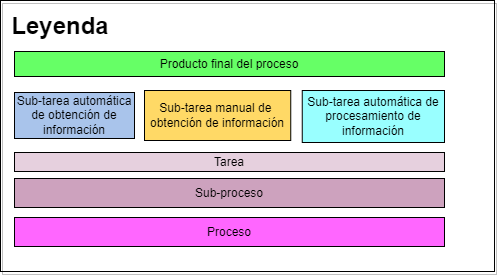

A continuación, se desarrolla cada proceso junto con el código en Python

# **Procesos de obtención de información**

La información necesaria para el análisis de las tesis se encuentra en dos lugares diferentes, el repositorio de tesis Renati y los repositorios de cada universidad. Es por eso que primero se obtiene la base de datos denominada DBTesis, cuya fuente son los repositorios de cada una de las 6 universidades. Debido a que la semántica de la web de cada repositorio es diferente por universidad, el proceso de scraping y crawling se realiza por separado y tiene un código diferente. Es importante mencionar que es posible que en el futuro esta semántica cambie, debido a las modificaciones normales del proceso de mejora continua por las que atraviesan las páginas webs.
Como segundo paso se toma DBTesis y le agregan las columnas generadas por los procesos de scraping y crawling en el repositorio de Renati, convirtiéndose ahora en DBRenatitesis. como producto final.

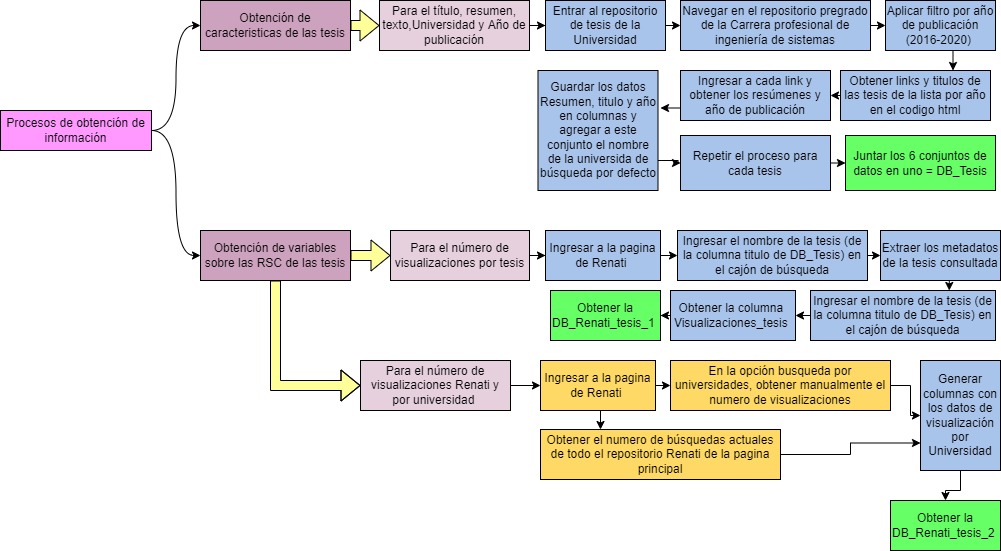


## **Obtención de características de las tesis** 🔽
El producto final de este subproceso es la DB_Tesis, se realiza mediante el uso de scraping y crawling de la página de cada Universidad. Las universidades elegidas son:


1.   Universidad Privada de Tacna (UPT) https://repositorio.upt.edu.pe
2. Universidad Nacional del Altiplano (UNA) http://repositorio.unap.edu.pe/
3. Universidad Andina del Cusco (UAC) https://repositorio.uandina.edu.pe/
4. Universidad Tecnológica de los Andes (UTEA) https://repositorio.utea.edu.pe/
5. Universidad Católica Santa María (UCSM) http://tesis.ucsm.edu.pe/repositorio/
6. Universidad Nacional de Moquegua (UNM) https://repositorio.unam.edu.pe/
7. Universidad Nacional Amazónica de Madre de Dios(UNAM) https://repositorio.unamad.edu.pe/

## **Obtención de variables sobre las RSC de las tesis** 📑

Una vez obtenidas las tesis, mediante el proceso anterior, con los nombres de las tesis se realiza la búsqueda automática en la página de Renati con el código adjunto:

In [ ]:
#SCRAPING DE LOS TITULOS DE LAS TESIS EN RENATI

Las 114 tesis en su mayoría pertenecen al año 2019 y tienen 6725 de visualizaciones respecto a todo el repositorio Renati en conjunto, llegando a un promedio de 18.19 visualizaciones por mes, respecto a otras carreras profesionales de la misma universidad.

# **Procesos de obtención de medición de indicadores**

Cada dimensión tiene subtareas específicas resultan de columnas relacionadas con la dimensión a obtener. Estas subtareas pueden ser automáticas por ejemplo el caso del indicador 'número de citas' o manual para el indicador 'Originalidad'. Respecto al indicador Originalidad, se utilizó el software antiplagio Turnitin. La razón por la cual se ingresaron manualmente los archivos PDF de las tesis, se debe a que no se encontró una herramienta de uso libre (open access) para realizar el procesamiento, así que se aplicó la herramienta Turnitin de uso personal, la cual limita el número de consultas y no permite el acceso automático con más de una documento a la vez.
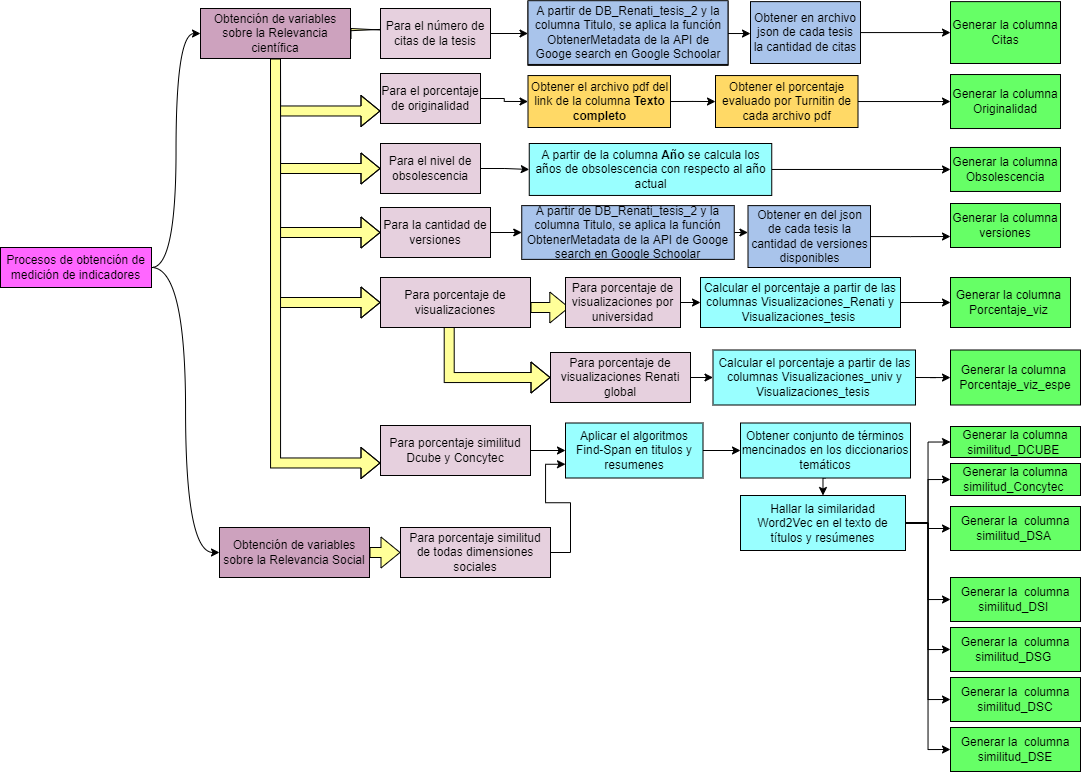


## **Obtención de variables sobre la Relevancia científica**

Mediante la API de Google research, se obtienen los indicadores de Google Scholar. En este caso se usó la versión gratuita que incluye el análisis de 100 registros gratuitos. Para completar la muestra de 114 tesis, se crearon 2 cuentas y asi sacar provecho de los beneficios.

### **Para Citas, Versiones y obsolescencia**

In [ ]:
#INSTALAR LAS LIBRERIAS
!pip install requests
!pip install lxml 
!pip install beautifulsoup4
!pip install google-search-results
!pip install PyDrive

In [ ]:
#IMPORTAR LAS LIBRERIAS
import requests, lxml
from bs4 import BeautifulSoup
from serpapi import GoogleSearch # API soulution
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
#LIBRERIAS PARA PROCESAMIENTO DE DATOS
import pandas as pd
#LIBRERIAS DE TIEMPO DE PROCESAMIENTO
import time
from tqdm import tqdm, trange, tqdm_notebook
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
import sys
#LIBRERIAS PARA WORD2 VEC
from collections import Counter
from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import json

In [ ]:
#CREAR EL CERTIFICADO DE AUTENTICACIÓN
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#FUNCIÓN DE SCRAPING DE INDICADORES EN GOOGLE SCHOLAR
def scraper(title):
  params = {
  "engine": "google_scholar",
  "q": title,
  "api_key": "XXXPONER EL KEY AQUIXXXX"}
  search = GoogleSearch(params)
  results = search.get_dict()
  return results

In [ ]:
#IMPORTAR EL CONJUNTO DE DATOS
import pandas as pd
db=pd.read_excel('DB_Renati_tesis_2.xlsx')

In [ ]:
#EJECUTAR LA FUNCION EN LOS TITULOS DE LA TESIS Y GUARDAR EN UNA COLUMNA
db['organic_results']=db.progress_apply(lambda x: scraper(x['Titulo']), axis=1)

In [ ]:
def get_versiones(registro):
  customer = json.loads(registro)
  try:
    if 'total' in customer['organic_results'][0]['inline_links']['versions']:
      element=customer['organic_results'][0]['inline_links']['versions']['total']
  except KeyError:
    element=0
  return element

In [ ]:
def get_citas(registro):
  #reg=r''
  customer = json.loads(registro)
  try:
    if 'total' in customer['organic_results'][0]['inline_links']['cited_by']:
      element=customer['organic_results'][0]['inline_links']['cited_by']['total']
  except KeyError:
    element=0
  return element

In [ ]:
db['Citas']=db['organic_results'].progress_apply(lambda x: get_citas(x))
db['Versiones']=db['organic_results'].progress_apply(lambda x: get_versiones(x))

In [ ]:
#GUARDAR LOS RESULTADOS EN UN ARCHIVO EXCEL
db.to_excel('DB_Renati_tesis_3.xlsx')

### **Para Porcentaje de vizualizaciones Renati**

In [ ]:
#SCRAPING DE VIZUALIZACION

### **Para similitud líneas concytec**

Es importante recordar, que para conocer las palabras clave del diccionario, se ejecuta primero el [modelo creado en Word2Vec](https://colab.research.google.com/drive/1RdzJkXltkgSO2nTzoTZCPuYkJInVtGOl?usp=sharing). Luego de ello, se utiliza el diccionario para obtener [la similitud ](https://github.com/PilarHidalgo/Find_span)entre el diccionario de  [palabras clave](https://github.com/PilarHidalgo/Proyecto_tesis_docencia/tree/main/Diccionario) y la tesis a analizar.

In [ ]:
#RECURSOS NLTK dataset
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

In [ ]:
#PREPROCESO DE TEXTO DE LA TESIS, EN LA COLUMNA TEXTO (RESUMEN DE LA TESIS)
def preprocess(text):
    nlp = Spanish()
    result= []
    for i in trange(0,len(text)):
        text[i]=str(text[i])
        text[i]=re.sub(u'^(?<![a-z A-Z])',' ',text[i])
        text[i]=text[i].lower()
        text[i]=text[i].replace('"',' ')
        text[i]=text[i].replace('(',' ')
        text[i]=text[i].replace(')',' ')
        text[i]=text[i].replace('\n',' ')
        text[i]=text[i].replace(']',' ')
        text[i]=text[i].replace('[',' ')
        text[i]=text[i].replace('/',' ')
        text[i]=text[i].replace('%',' ')
        text[i]=text[i].replace('+',' ')
        text[i]=text[i].replace('-',' ')
        text[i]=text[i].replace('.',' ')
        text[i]=text[i].replace(';',' ')
        text[i]=text[i].replace('\n',' ')
        text[i]=text[i].replace(':',' ')
        text[i]=text[i].replace('|',' ')
        text[i]=text[i].replace('*',' ')
        text[i]=text[i].replace('—',' ')
        text[i]=text[i].replace('€',' ')
        text[i]=text[i].replace('\\n',' ')
        text[i]=text[i].replace(',','')
        text[i]=text[i].replace(' ma ','')
        text[i]=text[i].replace(' aqui ','')
        text[i]=text[i].replace('cuales ','')
        text[i]=text[i].replace('toda ','')
        text[i]=text[i].replace('cada ','')
        text[i]=text[i].replace(' lo ','')
        a,b = 'áéíóúü','aeiouu'
        trans = str.maketrans(a,b)
        text[i]=text[i].translate(trans)
        text[i]=text[i].strip()
        doc=nlp(text[i])
        t=[token.text for token in doc]
        result.append(' '.join(list(t)))
    return result

In [ ]:
#APLICAR LA FUNCION PREPROCESS
db['Prep_text']=preprocess(db['Texto'])

In [ ]:
#OBTENER EL DICCIONARIO
diccionario=pd.read_excel('diccionario(1).xlsx')

In [ ]:
#aplicara los Tituloes el FINDSPAN
import sys
sys.path.append("..")
from itertools import chain
import more_itertools as mit
import pandas as pd
import spacy
from spacy.lang.xx import MultiLanguage
from spacy.pipeline import EntityRuler
import os
import re

#GET THE PARAMETERS FOR Find_span

class SpanFinder:
    def __init__(self, io, sheet2):
        self.io = io
        self.sheet2 = sheet2
        self.patterns = self.read_patterns()
        self.nlp = self.set_nlp()
        #self.diccionary_o = self.diccionary_o()
        self.trans = self.make_trans()

    #FIND SPAN FUNCTION
    def read_patterns(self):#,Type_file_dict):
        df=pd.read_excel(self.io,sheet_name=self.sheet2)#diccionary_o)
        df=df.rename(columns={'Unnamed: 0':'label'})
        df=df.replace('a','NaN')
        df=df.replace('s','NaN')
        df=df.replace('e','NaN')
        df=df.replace('m','NaN')
        df=df.replace('n','NaN')
        df=df.replace('n','NaN')
        df0=df[['label','pattern']]
            #carga el diccionario por label
        for k in range(1,len(df.columns)-1):
                exec(f'df{k} = df[["label","pattern.{k}"]]')
                #rename las columnas
        sheets=[]    
        for var in dir():
            if isinstance(locals()[var], pd.core.frame.DataFrame)  and var[0]!='_':
                sheets.append(var)
        df_list=[]
        for i in range(1,len(sheets)): 
            df_list.append(eval(sheets[i]))        

            #rename patterns columns
        for k in range(0,len(df_list)):#(len(df.columns)-2)):
            df_list[k]=df_list[k].rename(columns={df_list[k].columns[1]:"pattern"}, inplace = False)
            #diccionario
        for k in range(0,len(df_list)):
            exec(f'patterns{k+1} = df_list[k].to_dict(orient="records")')
        patt_list=[]    
        for var in dir():
            if var.startswith('patterns')==True and var[0]!='_':
                patt_list.append(eval(var))
        patterns=[]
        for i in range(0,len(patt_list)):
            patterns= patterns+patt_list[i]   
        #patterns=Diccionary_var
        return patterns
    def set_nlp(self):
        #Crear el objeto NLP
        nlp = MultiLanguage()
        ruler = EntityRuler(nlp)
        ruler.add_patterns(self.patterns)
        nlp.add_pipe(ruler)
        return nlp
    def make_trans(self):
        #Preprocesar la entrada
        a,b = 'áéíóúü','aeiouu'
        trans = str.maketrans(a,b)
        return trans
    
    def find_span(self, sentence):
        sentence=str(sentence).lower().translate(self.trans)
        doc = self.nlp(sentence)
        #Devuelve la etiqueta real de la entidad
        if (sentence=='' or  sentence==' ' or sentence=='Por definir' or sentence=='por definir' or
           sentence=='no hay datos ' or sentence=='nan'):
            label=['No encontrado']#con esto evitaremos el rpoblema de comillas
        else: 
            #label= list(set([(ent.label_) for ent in doc.ents]))
            label= list(set([(ent.text) for ent in doc.ents]))
        #label no establecida
        if label!=[]:
            label=label
        else: label=['No encontrado']#con esto evitaremos el problema de comillas
            
        return  label[0]

In [ ]:
#APLICAR LA FUNCION FindSpan para obtener las palabras clave EN EL RESUMEN
#DCUBE
finder_dcube=SpanFinder('diccionario (1).xlsx','Sheet1')
db['DCUBE_W']=db['Resumen'].progress_apply(finder_dcube.find_span)
#CONCYTEC
finder_concy=SpanFinder('diccionario (1).xlsx','Hoja7')
db['CONCYTEC_W']=db['Resumen'].progress_apply(finder_concy.find_span)

In [ ]:
#APLICAR LA FUNCION FindSpan para obtener las palabras clave EN EL TITULOS
#DCUBE
finder_dcube=SpanFinder('diccionario (1).xlsx','Sheet1')
db['DCUBET']=db['Titulo'].progress_apply(finder_dcube.find_span)
#CONCYTEC
finder_concy=SpanFinder('diccionario (1).xlsx','Hoja7')
db['CONCYTECT']=db['Titulo'].progress_apply(finder_concy.find_span)

In [ ]:
#IMPORTAR EL MODELO ENTRENADO CON LOS DOCUMENTOS ESPECIFICOS
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import Word2Vec
model_concytec = Word2Vec.load("data/model/trainned_model_concy.model")
model_NCUBE = Word2Vec.load("data/model/trainned_model_NCUBE.model")

In [ ]:
#funcion similitud con el modelo WORD2VEC
def simili_w2v(palabra, model):
  try:
    simi=model.wv.most_similar(palabra, topn=1)
  except KeyError:
    simi=('No encontrado',0)
  return simi[0][1] 

In [ ]:
#APLICAR LA FUNCION DE SIMILITUD
db['similitud_DCUBE']=db['DCUBE_W'].progress_apply(lambda x: simili_w2v(x))
db['similitud_CONCYTEC']=db['CONCYTEC_W'].progress_apply(lambda x: simili_w2v(x))

# **Obtención de variables sobre la Relevancia científica**
Aprovechando la sub-tarea automática de similitud y los diccionarios, tambien se aplican las mismas funciones para la medición de la relevancia Social



In [ ]:
#APLICAR LA FUNCION FindSpan para obtener las palabras clave EN EL RESUMEN
#ODS
finder_DSA=SpanFinder('diccionario (1).xlsx','Hoja5')
data['DSA']=data['Resumen'].progress_apply(finder_DSA.find_span)
#dsi
finder_DSI=SpanFinder('diccionario (1).xlsx','Hoja1')
data['DSI']=data['Resumen'].progress_apply(finder_DSI.find_span)
#dsi
finder_DSG=SpanFinder('diccionario (1).xlsx','Hoja4')
data['DSG']=data['Resumen'].progress_apply(finder_DSG.find_span)
#dsi
finder_DSE=SpanFinder('diccionario (1).xlsx','Hoja3')
data['DSE']=data['Resumen'].progress_apply(finder_DSE.find_span)
#dsi
finder_DSD=SpanFinder('diccionario (1).xlsx','Hoja2')
data['DSD']=data['Resumen'].progress_apply(finder_DSD.find_span)
#dsi
finder_DSC=SpanFinder('diccionario (1).xlsx','Hoja6')
data['DSC']=data['Resumen'].progress_apply(finder_DSC.find_span)

In [ ]:
#APLICAR LA FUNCION FindSpan para obtener las palabras clave EN LOS TITULOS
#ODS
finder_DSA=SpanFinder('diccionario (1).xlsx','Hoja5')
data['DSAT']=data['Titulo'].progress_apply(finder_DSA.find_span)
#dsi
finder_DSI=SpanFinder('diccionario (1).xlsx','Hoja1')
data['DSIT']=data['Titulo'].progress_apply(finder_DSI.find_span)
#dsi
finder_DSG=SpanFinder('diccionario (1).xlsx','Hoja4')
data['DSGT']=data['Titulo'].progress_apply(finder_DSG.find_span)
#dsi
finder_DSE=SpanFinder('diccionario (1).xlsx','Hoja3')
data['DSET']=data['Titulo'].progress_apply(finder_DSE.find_span)
#dsi
finder_DSD=SpanFinder('diccionario (1).xlsx','Hoja2')
data['DSDT']=data['Titulo'].progress_apply(finder_DSD.find_span)
#dsi
finder_DSC=SpanFinder('diccionario (1).xlsx','Hoja6')
data['DSCT']=data['Titulo'].progress_apply(finder_DSC.find_span)